这是处理cube、fits的一些简单示例。有问题或者bug欢迎联系xuchen@nao.cas.cn

2023/1/1 update

In [1]:
import numpy as np
from matplotlib import pyplot as plt
# 如果找不到包
#import sys
#sys.path.append('../../../pkgs/hiviewer/') #这里是包的路径，临时添加到sys.path
from hiviewer import FitsPic
from hiviewer.overlap import overlap_img_contour,overlap_two_contours,two_contours_with_peaks
from hiviewer.HIsource_hv import HIsource

In [2]:
fastcube = FitsPic('./data/M33_FAST_cube_new.fits')
arbocube = FitsPic('./data/M33_arecibo.fits')
#    Arecibo data: http://www.naic.edu/~ages/public_cubes/M33_local.fits.gz
#    and article: http://adsabs.harvard.edu/abs/2016MNRAS.456..951K
vlacube = FitsPic('./data/M33_HI_12sec-area.fits')
#    VLA data and article: https://www.researchgate.net/publication/260025915_M33_HI_maps
optical = FitsPic('./data/MESSIER_033_I_103aE_dss1.fits')
#    from NED, photoed by Palomar Observatory.

# primary operation

In [3]:
fastcube.hd0

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                   31                                                  
NAXIS2  =                   34                                                  
NAXIS3  =                 4471                                                  
WCSAXES =                    3 / Number of coordinate axes                      
CRPIX1  =                 16.0 / Pixel coordinate of reference point            
CRPIX2  =                 17.5 / Pixel coordinate of reference point            
CRPIX3  =               2236.0 / Pixel coordinate of reference point            
CDELT1  =   -0.050000000000001 / [deg] Coordinate increment at reference point  
CDELT2  =    0.050000000000001 / [deg] Coordinate increment at reference point  
CDELT3  =    -0.100641794522

In [4]:
print(fastcube.data.shape,fastcube.ndim)
print(fastcube.wcs_obj)

(4471, 34, 31) 3
WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---CAR'  'DEC--CAR'  'VELOCITY'  
CRVAL : 23.525  30.65  -174.98472414917  
CRPIX : 16.0  17.5  2236.0  
PC1_1 PC1_2 PC1_3  : 1.0  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  1.0  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : -0.050000000000001  0.050000000000001  -0.10064179452236  
NAXIS : 31  34  4471


In [5]:
fastcube.cube

SpectralCube with shape=(4471, 34, 31):
 n_x:     31  type_x: RA---CAR  unit_x: deg    range:    22.645724 deg:   24.404276 deg
 n_y:     34  type_y: DEC--CAR  unit_y: deg    range:    29.822116 deg:   31.472066 deg
 n_s:   4471  type_s: VELO      unit_s: km / s  range:     -399.919 km / s:      49.950 km / s

In [6]:
fastcube.velo

<Quantity [  49.94968661,   49.84904481,   49.74840302, ..., -399.71785132,
           -399.81849311, -399.91913491] km / s>

In [7]:
fastcube.cdelt[1]

0.050000000000001

In [8]:
arbocube.beam #arecibo resolution 3.5'

Beam: BMAJ=204.0119960904 arcsec BMIN=204.0119960904 arcsec BPA=0.0 deg

In [9]:
print(f'{fastcube.beam}, {vlacube.beam}')

8.628974074672004e-07 sr, 3.7156653504257507e-09 sr


In [10]:
# 坐标转换
px,py = fastcube.deg2pix(ra = 23.5,dec = 30, around=True)# 取一个最近的pixel,默认取整
print(px,py)
ra,dec = fastcube.pix2deg(px,py)
print(ra,dec)
from hiviewer.utils import coord2str
coord2str(ra,dec,output='hmsdms',frame='icrs')

15 4
23.525000000000006 30.024999999999984


'01h34m06s +30d01m30s'

## moment maps and plot

In [11]:
help(fastcube.slab_moment)

Help on method slab_moment in module hiviewer.core:

slab_moment(v1, v2, filepath='./data/fast', m0=True, m1=False, m2=False, m2_type='sigma', NAME_WITH_V=True) method of hiviewer.core.FitsPic instance
    Only for 3D cubes
    slab velocity from v1 km/s to v2 km/s.
        eg. For M33, v1 = -300km/s and v2 = -50km/s , like this
        
    You can choose to compute  3 moment maps. m0, m1 and m2.
    These new 2D maps will be saved as new FITS files.
    m2_type：
            'variance': M2
            'sigma'：sigma = np.sqrt(M2)
            'fwhm':fwhm = np.sqrt(8ln2)*sigma



In [12]:
# 获得moments maps
fastcube.slab_moment(v1=-300,v2=-50,filepath='./data/fast',m0=True,m1=True)

INFO: Producing moment maps.Slab velocity :-300km/s and -50km/s.  [hiviewer.core]
INFO:  saved ./data/fast-300-50_HI-moment0.fits  [hiviewer.core]
INFO:  saved ./data/fast-300-50_HI-moment1.fits  [hiviewer.core]


In [13]:
arbocube.slab_moment(v1=-300,v2=-50,filepath='./data/arbo',m0=True)

INFO: Producing moment maps.Slab velocity :-300km/s and -50km/s.  [hiviewer.core]
INFO:  saved ./data/arbo-300-50_HI-moment0.fits  [hiviewer.core]


In [14]:
fastm0 = FitsPic('./data/fast-300-50_HI-moment0.fits')

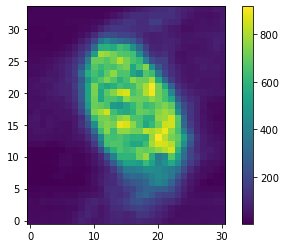

In [15]:
plt.imshow(fastm0.data,origin = 'lower')
plt.colorbar()

plot slice at velocity -150 km/s
The 3rd parameter is -150.0255591076573 km / s


<WCSAxesSubplot:xlabel='RA (J2000)', ylabel='Dec (J2000)'>

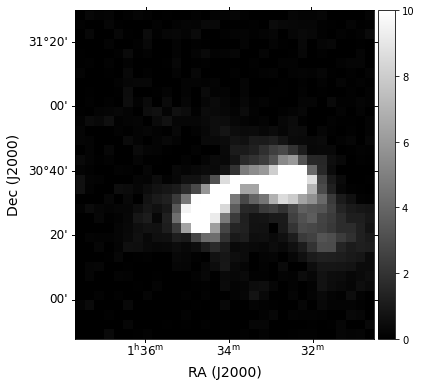

In [16]:
# 画cube中的一片,保存到fig文件夹
sel = fastcube.velo2sel(-150)
print(f"plot slice at velocity -150 km/s")
fastcube.plot_slice(figsize=(6,5),vmin_max=(0,10),sel=sel,cmap = 'gray',picname = './fig/M33',save=True)

In [17]:
help(fastm0.plot_slice)
# 可以改coord_format

Help on method plot_slice in module hiviewer.core:

plot_slice(sel=0, cmap='gray', figsize=(6, 5), picname='./', per_vmin_max=None, coord_format=None, save=False, xylim=None, vmin_max=None) method of hiviewer.core.FitsPic instance
    select which slice you want.It will show a slice image.
    Or use #self.cube[sel,:,:].quicklook()#
    The syntax for the format string is the following:
        format      result
        'dd'        '15d'
        'dd:mm'     '15d24m'
        'dd:mm:ss'  '15d23m32s'
        'dd:mm:ss.s'        '15d23m32.0s'
        'dd:mm:ss.ssss'     '15d23m32.0316s'
        'hh'        '1h'
        'hh:mm'     '1h02m'
        'hh:mm:ss'  '1h01m34s'
        'hh:mm:ss.s'        '1h01m34.1s'
        'hh:mm:ss.ssss'     '1h01m34.1354s'
        'd' '15'
        'd.d'       '15.4'
        'd.dd'      '15.39'
        'd.ddd'     '15.392'
        'm' '924'
        'm.m'       '923.5'
        'm.mm'      '923.53'
        's' '55412'
        's.s'       '55412.0'
        's.ss'

Showing image.


<WCSAxesSubplot:xlabel='RA (J2000)', ylabel='Dec (J2000)'>

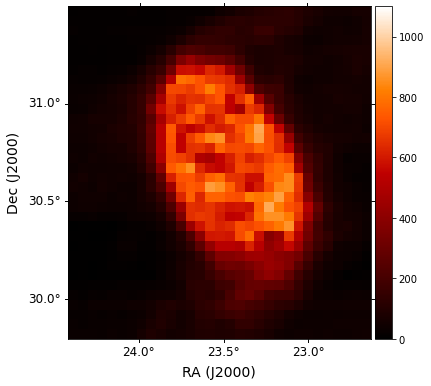

In [18]:
# 可以改具体的画图参数
fastm0.plot_slice(figsize=(6,5),vmin_max=(0,1100),cmap = 'gist_heat',picname = './fig/M33',
                  coord_format='d.d')

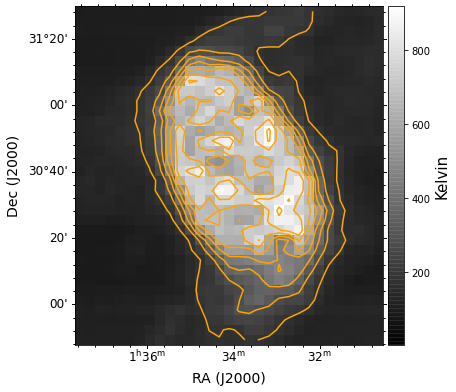

In [19]:
fastm0.plot_contour(figsize=(6,5),levels=np.linspace(100,1000,9),alpha=0.9,clabel=False,
                    cbar_label='Kelvin', picname ='./fig/M33',save = True)

### p - v diagram

The fixed ra is nearly 23.23425314153394 deg


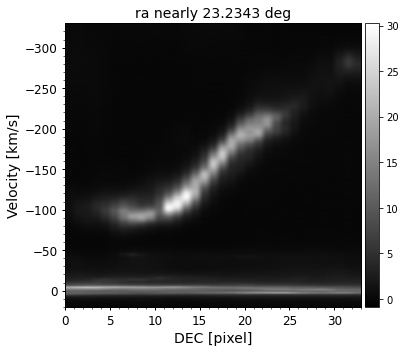

In [20]:
# 画cube侧面的图，固定一个大致的ra
fastcube.plot_side_slice(sel = 20,axis=2,cmap = 'gray',figsize=(6,5),xylim=[0,33,20,-330])

The fixed dec is nearly 30.824987048539302 deg


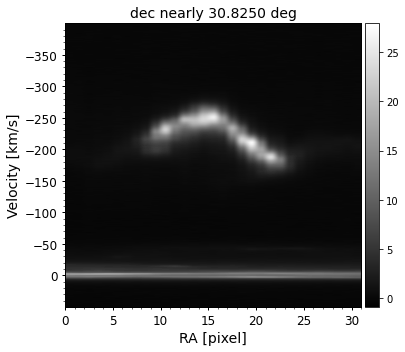

In [21]:
# 画cube侧面的图，固定一个大致的dec
fastcube.plot_side_slice(sel = 20,axis=1,cmap = 'gray',figsize=(6,5))

contour level to fit: 918.220 * 0.5
fitting contour 0
Found a near-center ellipse :D  hhh

========= Fit results ellipse model ==========
Center pixel: [15.919752139895749, 17.558337260901254]
SemiMajor pixel: 6.52315196510668
SemiMinor pixel: 10.499754653035346
Phi rad: 0.48979090075390486
=============== Fit Finished ===================


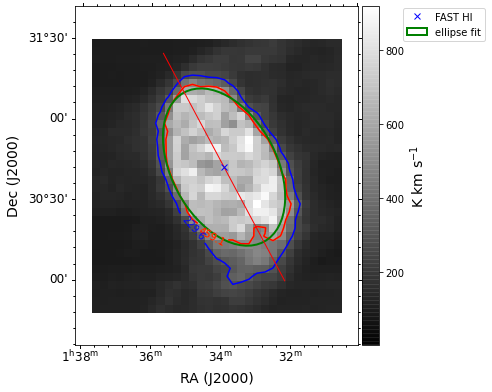

In [22]:
# 用等高线拟合椭圆，画出长轴
HIso = HIsource(fastcube,fastm0)
his = HIso.fit_contour(factor = 0.5, line_length= 16,
                       clabel=True, cbar_label = '$\mathrm{K \ km \ s^{-1}}$')

这里参考了任致远老师多波段课上的代码，感恩～

[[15.919752139895749, 17.558337260901254], 6.52315196510668, 10.499754653035346, 0.48979090075390486]


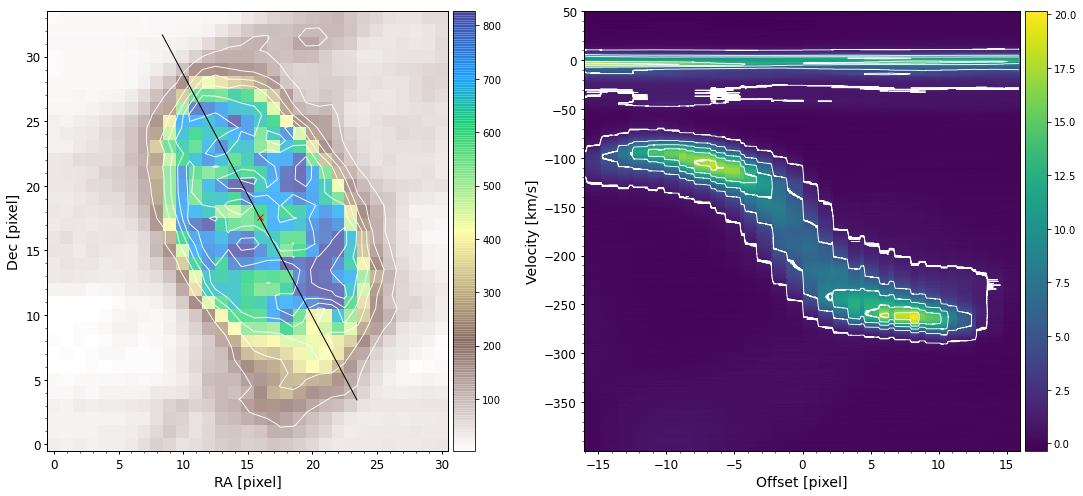

In [23]:
print(HIso.coef)
center = HIso.center
pa = HIso.phi
# 长轴方向的pv图
HIso.pv_plot(center, pa, line_length = 16, )

等高线难看就直接改代码吧。。。

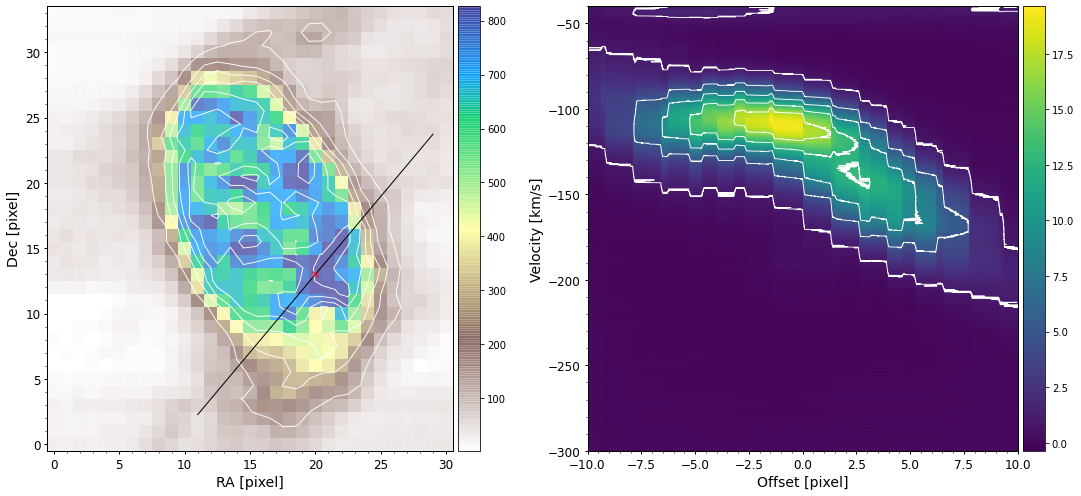

In [24]:
center = [20, 13]
pa = np.deg2rad(-40)
# 也可以任意指定中心和旋转角
HIso.pv_plot(center, pa, line_length = 14, ovlim = [-10, 10, -300, -40])

# Inspect a Spectrum

ra=23,dec=30.5, px,py=(24, 14)


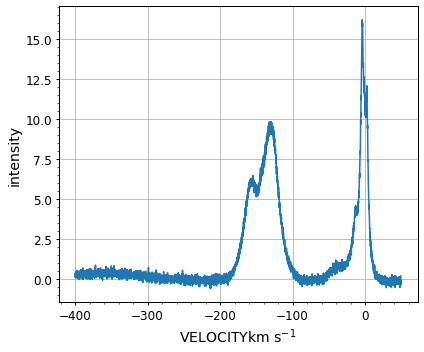

ra=23.002604234747764,dec=30.523954193325658, px,py=(24, 14)


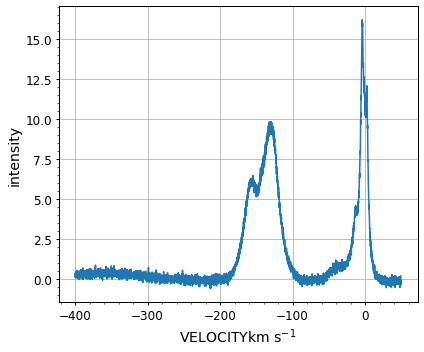

In [25]:
ra = 23; dec = 30.5
px = 24; py = 14
fastcube.plot_spec(ra, dec, coord_type='radec')#default 
fastcube.plot_spec(px, py, coord_type='pixel')

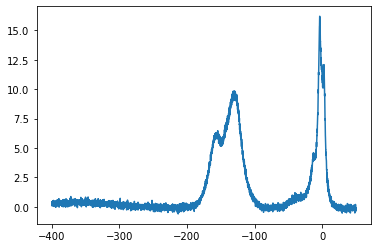

In [26]:
# 也可以自己画
vel = fastcube.velo.value
spec = fastcube.get_spec(px, py, coord_type='pixel')
plt.plot(vel, spec)

# convolve and reproject

In [27]:
help(fastcube.reproj_convolve_cube)

Help on method reproj_convolve_cube in module hiviewer.core:

reproj_convolve_cube(reproj_target, beam_target, fitsname, method='montage', v1=None, v2=None, slabm0=True) method of hiviewer.core.FitsPic instance
    We use package montage/kapteyn/reproject to reproject self to reproj_target shape. 
    In this process, the pixel size will be the same as reproject target.
    Then use convolve_to in SpectralCube to convolve beam to the target beam. 
    
    Read the fits header to get beam infomation.If it doesn't has,there will be a warning. Just 
    add a beam on the header.
    
    
    Parameters
    ------------
    self,reproj_target,beam_target: FitsPic Class Object.
    method: montage/kapteyn/reproject. Choose one of these packages to reproject.
    v1,v2: slab moment 0 , from v1 to v2. the same as slab_moment if slabm0=True
    fitsname:str.The result fits will be named as [fitsname+'_convolve_reproj_result.fits']
    
    REMEMBER the 'self' object must have 3 or 4 dimensio

In [28]:
help(fastcube.reproj_convolve_2D)

Help on method reproj_convolve_2D in module hiviewer.core:

reproj_convolve_2D(reproj_target, beam_target, fitsname, method='montage') method of hiviewer.core.FitsPic instance
    We use package montage/kapteyn/reproject to reproject self to reproj_target shape. 
    In this process, the pixel size will be the same as reproject target.
    Then use  convolve_fft in astropy to convolve beam to target beam.
    
    Read the fits header to get beam infomation.If it doesn't has,there will be a warning. Just 
    add a beam on the header.
    
    
    Parameters
    ------------
    self,reproj_target,beam_target: FitsPic Class Object.
    method: montage/kapteyn/reproject. Choose one of these packages to reproject.
    
    fitsname:str.The result fits will be named as [fitsname+'_convolve_reproj_result.fits']
    REMEMBER the 'self' object must have 2 dimensions.
    reproj_target should be 2D FitsPics.
    beam_target can be 2D/3D/4D FitsPics.
    
    Result
    --------
    A 2D fits

In [29]:
#resolution and pixel size
print(fastcube.beam,fastcube.cdelt)
print(arbocube.beam,arbocube.cdelt)
print(vlacube.beam,vlacube.cdelt)

Beam: BMAJ=180.0 arcsec BMIN=180.0 arcsec BPA=0.0 deg [-0.05        0.05       -0.10064179]
Beam: BMAJ=204.0119960904 arcsec BMIN=204.0119960904 arcsec BPA=0.0 deg [-1.66666667e-02  1.66666667e-02 -5.14726510e+03]
Beam: BMAJ=11.987157583929601 arcsec BMIN=11.638746899622 arcsec BPA=-31.85496410019 deg [-1.11111111e-03  1.11111111e-03 -1.28813923e+03  1.00000000e+00]


In [30]:
arbom0 = FitsPic('./data/arbo-300-50_HI-moment0.fits')
fastm0 = FitsPic('./data/fast-300-50_HI-moment0.fits')

## 举例：使用不同的方法，卷积到arbocube的分辨率，重新投影到fastm0上
把三者统一成最低的分辨率（这里采用了arbocube，或者任意arbo的）和最大的格点大小（fastm0）。

三维：reproj_convolve_cube

二维：reproj_convolve_2D

reproject methods：
* montage
* kapteyn
* reproject

In [31]:
# 将4维(1, 1, 1201, 811)的cube当作2维moment0，卷积并重新投影
vlacube = FitsPic('./data/M33_HI_12sec-area.fits')
vlacube.reproj_convolve_cube(fastm0,arbocube,fitsname='./data/vla_montage',method='montage')

./data/vla_montage_convolve_reproj_result.fits already exsist.Delete it...


Its data shape is (1, 1, 1201, 811).So don't slab moment 0. 
INFO: Reprojecting the moment0 of the cube... [hiviewer.core]
INFO: Deleting work directory /tmp/tmpgkryt_9z [montage_wrapper.wrappers]
INFO:  Create a new fits file ./data/vla_montage_convolve_reproj_result.fits [hiviewer.core]


In [32]:
vlacube = FitsPic('./data/M33_HI_12sec-area.fits')
vlacube.reproj_convolve_cube(fastm0,arbocube,fitsname='./data/vla_kapteyn',method='kapteyn')

./data/vla_kapteyn_convolve_reproj_result.fits already exsist.Delete it...


Its data shape is (1, 1, 1201, 811).So don't slab moment 0. 
INFO: Reprojecting the moment0 of the cube... [hiviewer.core]
INFO:  Create a new fits file ./data/vla_kapteyn_convolve_reproj_result.fits [hiviewer.core]


In [33]:
vlacube = FitsPic('./data/M33_HI_12sec-area.fits')
vlacube.reproj_convolve_cube(fastm0,arbocube,fitsname='./data/vla_reproject',method='reproject')

./data/vla_reproject_convolve_reproj_result.fits already exsist.Delete it...


Its data shape is (1, 1, 1201, 811).So don't slab moment 0. 
INFO: Reprojecting the moment0 of the cube... [hiviewer.core]
INFO:  Create a new fits file ./data/vla_reproject_convolve_reproj_result.fits [hiviewer.core]


In [34]:
# 比较三种方法
vm = FitsPic('./data/vla_montage_convolve_reproj_result.fits')
vk = FitsPic('./data/vla_kapteyn_convolve_reproj_result.fits')
vr = FitsPic('./data/vla_reproject_convolve_reproj_result.fits')

Showing image.


<WCSAxesSubplot:xlabel='RA (J2000)', ylabel='Dec (J2000)'>

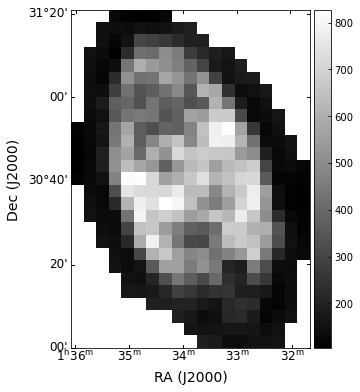

In [35]:
vm.plot_slice(save = False)

Showing image.


<WCSAxesSubplot:xlabel='RA (J2000)', ylabel='Dec (J2000)'>

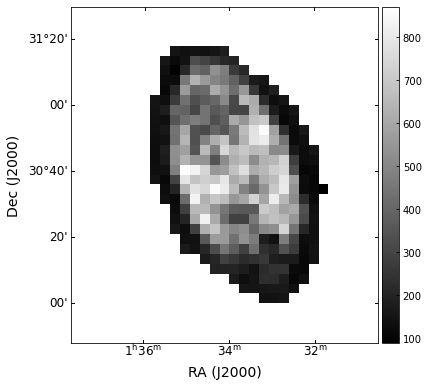

In [36]:
vk.plot_slice(save = False)

Showing image.


<WCSAxesSubplot:xlabel='RA (J2000)', ylabel='Dec (J2000)'>

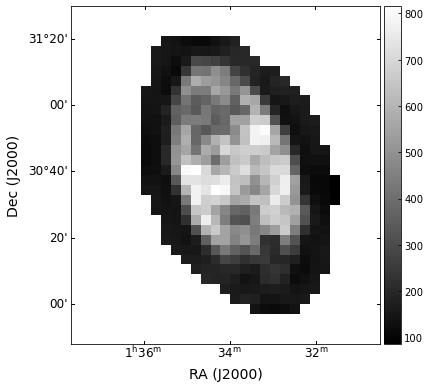

In [37]:
vr.plot_slice(save = False)

下面我们把让他们使用fast的投影，卷积到arecibo的分辨率

In [38]:
# 3维的数据, 这个只需要卷积，得到moment0，所以需要slab_moment的参数v1=-300,v2=-50
fastcube.reproj_convolve_cube(fastm0,arbocube,v1=-300,v2=-50,fitsname='./data/fast_reproject',method='reproject')

./data/fast_reproject_convolve_reproj_result.fits already exsist.Delete it...


Producing convolved moment 0 from the cube.Slab velocity :-300km/s and -50km/s. 
INFO: Reprojecting the moment0 of the cube... [hiviewer.core]
INFO:  Create a new fits file ./data/fast_reproject_convolve_reproj_result.fits [hiviewer.core]


In [39]:
# 整个cube投影到另一个上，可能需要较长时间，这里示例的keyboard中止了。目前只有montage支持投影cube
arbocube.reproj_convolve_cube(fastcube,arbocube,slabm0=False,fitsname='./data/arbocube2fastcube_',method='montage')

INFO: Reprojecting the whole cube... [hiviewer.core]


AttributeError: 'Header' object has no attribute 'fromTxtFile'

如果发现如上报错了，大概是montage太老了，`newheader = newheader.fromtextfile(header_temp)`改一下。参考https://github.com/astropy/montage-wrapper/issues/62

In [40]:
# 二维对象适用reproj_convolve_2D，依赖astropy的卷积和montage/kapteyn/reproject的方法
arbom0 = FitsPic('./data/arbo-300-50_HI-moment0.fits')
# arbom0.reproj_convolve_2D(fastm0,arbocube,fitsname='./data/arbo_astropy_kapteyn',method='kapteyn')
arbom0.reproj_convolve_2D(fastm0,arbocube,fitsname='./data/arbo_astropy_reproject',method='reproject')
#arbom0.reproj_convolve_2D(fastm0,arbocube,fitsname='./data/arbo_astropy_montage',method='montage')

./data/arbo_astropy_reproject_reproj.fits already exsist.Delete it...
INFO:  Create a new fits file named ./data/arbo_astropy_reproject_reproj.fits [hiviewer.core]


In [41]:
# 以下结果都作出一个moment0，所以要求对象是三维的cube。以使用默认的montage方法为例。
fastcube.reproj_convolve_cube(fastm0,arbocube,v1=-300,v2=-50,fitsname='./data/fast')
arbocube.reproj_convolve_cube(fastm0,arbocube,v1=-300,v2=-50,fitsname='./data/arbo')
vlacube.reproj_convolve_cube(fastm0,arbocube,fitsname='./data/vla')

./data/fast_convolve_reproj_result.fits already exsist.Delete it...
Producing convolved moment 0 from the cube.Slab velocity :-300km/s and -50km/s. 
INFO: Reprojecting the moment0 of the cube... [hiviewer.core]
INFO: Deleting work directory /tmp/tmplc46ikh8 [montage_wrapper.wrappers]
INFO:  Create a new fits file ./data/fast_convolve_reproj_result.fits [hiviewer.core]
./data/arbo_convolve_reproj_result.fits already exsist.Delete it...


Producing convolved moment 0 from the cube.Slab velocity :-300km/s and -50km/s. 
INFO: Reprojecting the moment0 of the cube... [hiviewer.core]
INFO: Deleting work directory /tmp/tmpvk9rji12 [montage_wrapper.wrappers]
INFO:  Create a new fits file ./data/arbo_convolve_reproj_result.fits [hiviewer.core]
./data/vla_convolve_reproj_result.fits already exsist.Delete it...
Its data shape is (1, 1, 1201, 811).So don't slab moment 0. 
INFO: Reprojecting the moment0 of the cube... [hiviewer.core]


INFO: Deleting work directory /tmp/tmp5ent6yp8 [montage_wrapper.wrappers]
INFO:  Create a new fits file ./data/vla_convolve_reproj_result.fits [hiviewer.core]


In [42]:
#using these to compare
arbo = FitsPic('./data/arbo_convolve_reproj_result.fits')
fast =FitsPic('./data/fast_convolve_reproj_result.fits')
vla= FitsPic('./data/vla_convolve_reproj_result.fits')

In [43]:
print(fast.data.shape,arbo.data.shape,vla.data.shape)
# shape不是完全一样，因为原始数据区域覆盖的就不一样。当然用别的方法结果也会不同

(33, 31) (34, 31) (27, 19)


In [44]:
arbo.hd0

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   31                                                  
NAXIS2  =                   34                                                  
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
DATEREF = '1858-11-17'         / ISO-8601 fiducial time                         
MJDREFI =                  0.0 / [d] MJD of fiducial time, integer part         
MJDREFF =                  0.0 / [d] MJD of fiducial time, fractional part      
EQUINOX =               2000.0                                                  
LINE    = 'HI      '        

In [45]:
vla.hd0

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   19                                                  
NAXIS2  =                   27                                                  
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
DATEREF = '1858-11-17'         / ISO-8601 fiducial time                         
MJDREFI =                  0.0 / [d] MJD of fiducial time, integer part         
MJDREFF =                  0.0 / [d] MJD of fiducial time, fractional part      
EQUINOX =               2000.0                                                  
LINE    = 'HI      '        

In [46]:
fast.hd0

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   31                                                  
NAXIS2  =                   33                                                  
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
DATEREF = '1858-11-17'         / ISO-8601 fiducial time                         
MJDREFI =                  0.0 / [d] MJD of fiducial time, integer part         
MJDREFF =                  0.0 / [d] MJD of fiducial time, fractional part      
EQUINOX =               2000.0                                                  
LINE    = 'HI      '        

# compare and overlap

In [47]:
#函数提供的contour levels，可以在代码里面修改，经验的公式不太靠谱
flevels=fast.center_levels('K')
alevels=arbo.center_levels('Jy')
vlevels=vla.center_levels('K')

INFO: It's just a expirical level created automaticly! [hiviewer.core]
INFO: It's just a expirical level created automaticly! [hiviewer.core]
INFO: It's just a expirical level created automaticly! [hiviewer.core]


In [48]:
#人工选择的contour levels
alevels=(158.4-np.logspace(1.83,2.09,23))[::-1]
flevels=(1120-np.logspace(1.9,2.8,23))[::-1]
vlevels=(1100-np.logspace(2.2,3.06,17))[::-1]
print(f"arbo levels:{alevels}")
print(f"fast levels:{alevels}")
print(f"vla levels:{vlevels}")

arbo levels:[35.37312292 38.67583462 41.88988354 45.01764988 48.06144993 51.02353779
 53.90610709 56.71129251 59.44117148 62.09776562 64.6830423  67.19891606
 69.64725007 72.02985745 74.34850267 76.60490282 78.80072889 80.93760703
 83.01711972 85.04080695 87.01016739 88.92665947 90.79170246]
fast levels:[35.37312292 38.67583462 41.88988354 45.01764988 48.06144993 51.02353779
 53.90610709 56.71129251 59.44117148 62.09776562 64.6830423  67.19891606
 69.64725007 72.02985745 74.34850267 76.60490282 78.80072889 80.93760703
 83.01711972 85.04080695 87.01016739 88.92665947 90.79170246]
vla levels:[-48.1536215   85.50479193 203.60381405 307.95473868 400.158004
 481.62773861 553.61345012 617.21918894 673.4204812  723.07929045
 766.95723769 805.72728238 839.98404368 870.2529202  896.99814801
 920.62992076 941.51068075]


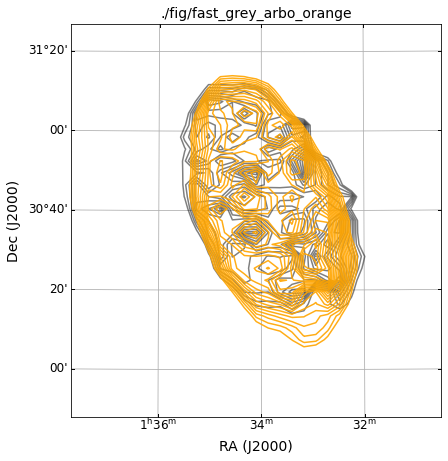

In [49]:
overlap_two_contours(fast,arbo,bklevels=flevels,folevels=alevels, radec_range = None,
                     alphabk=0.5,c='orange',picname='./fig/fast_grey_arbo_orange',save = False)

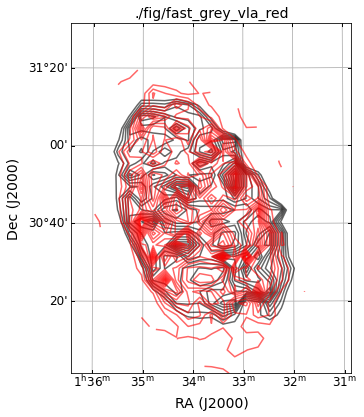

In [50]:
overlap_two_contours(fast,vla,bklevels=flevels,folevels=vlevels, radec_range =(22.7,24.1,30,31.5),
                     alphafo=0.6,c='red',picname='./fig/fast_grey_vla_red',save=False)

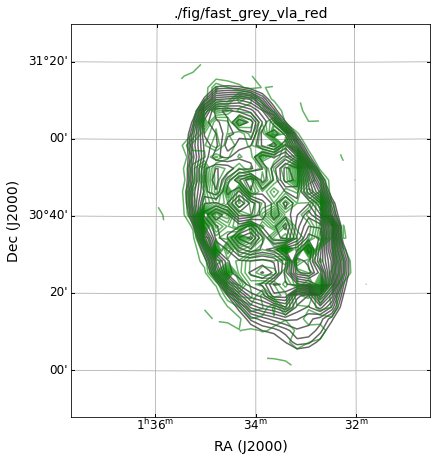

In [51]:
overlap_two_contours(arbo,vla,bklevels=alevels,folevels=vlevels,
                     alphafo=0.6,c='g',picname='./fig/fast_grey_vla_red',save=False)

In [52]:
fastm0=FitsPic('./data/fast-300-50_HI-moment0.fits')
fastm1=FitsPic('./data/fast-300-50_HI-moment1.fits')

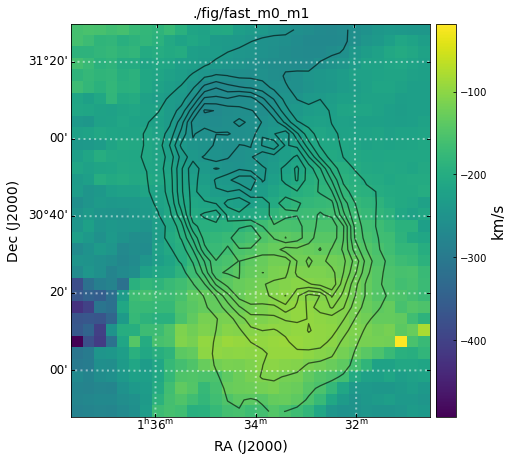

In [53]:
overlap_img_contour(fastm1,fastm0,levels=np.linspace(100,1000,9),c='k',alpha=0.6, 
                     bar_label='km/s', picname='./fig/fast_m0_m1',save = False)

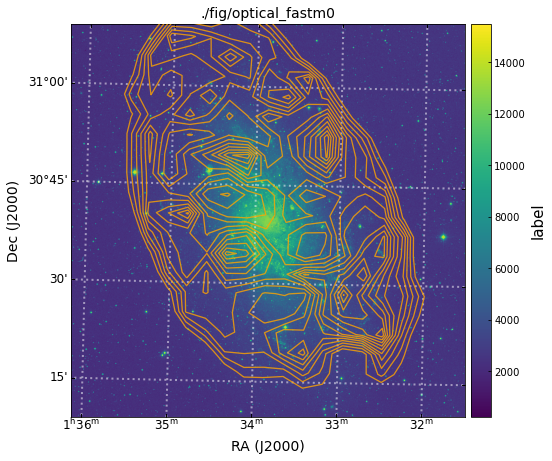

In [54]:
overlap_img_contour(optical,fastm0,levels=flevels,
                    picname='./fig/optical_fastm0',save = False)

INFO:  The first you input(bk =) is background.The second you input(fo =) is foreround. When comparing these two, the valley floor positions are less accurate than the peaks,          because their gradient is smaller. [hiviewer.overlap]


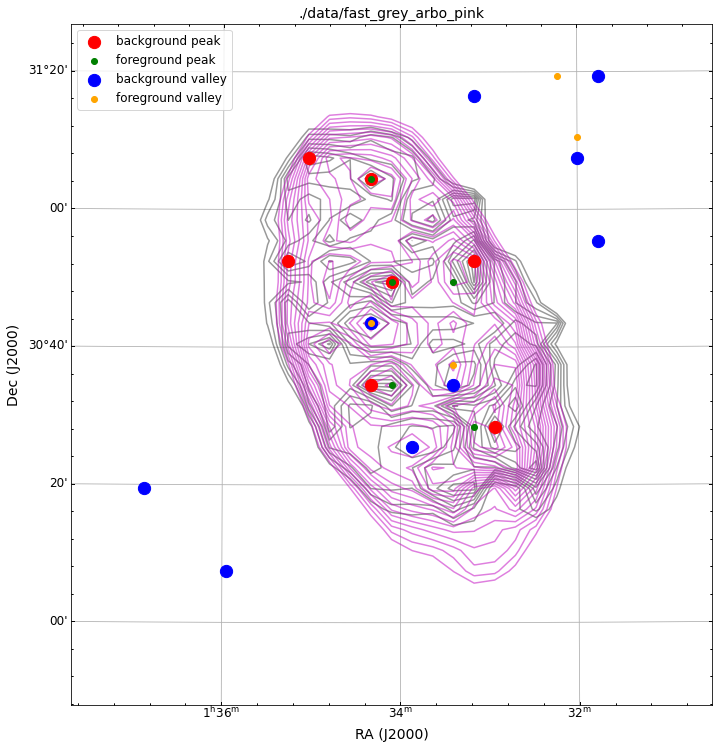

In [55]:
#标记峰/谷值点，感觉不常用
two_contours_with_peaks(fast,arbo,min_distance=2,bklevels=flevels,folevels=alevels,figsize = (10,10),
                        alphabk=0.4,picname='./data/fast_grey_arbo_pink',save = False)

# end
本教程就到这里，如果有帮助的话欢迎关注答主知乎号，[astroR2](https://www.zhihu.com/people/stellarxu)

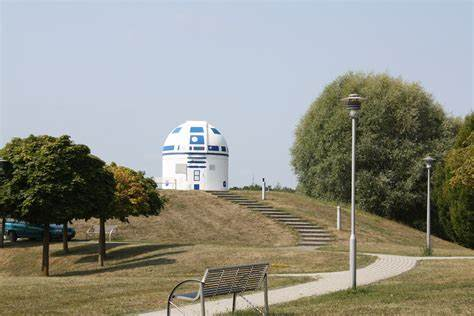